<a href="https://colab.research.google.com/github/msuraj248/DeepLearning/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
single_img = x_train[4].reshape(28,28)

In [ ]:
pip install tensorflow==1.15

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [18]:
import gzip
mnist = input_data.read_data_sets("mnist.zs/",one_hot=True)

Extracting mnist.zs/train-images-idx3-ubyte.gz
Extracting mnist.zs/train-labels-idx1-ubyte.gz
Extracting mnist.zs/t10k-images-idx3-ubyte.gz
Extracting mnist.zs/t10k-labels-idx1-ubyte.gz


In [19]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [20]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mnist.train.num_examples
mnist.train.num_examples
mnist.train.images.shape
mnist.train.images[1]

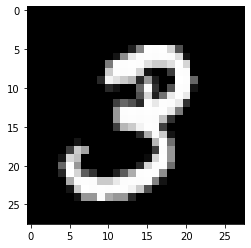

In [23]:
import matplotlib.pyplot as plt
single_img = mnist.train.images[1].reshape(28,28)
plt.imshow(single_img,cmap="gist_gray")

In [ ]:
single_img.max()
single_img.min()

In [25]:
x = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [ ]:
#LOSS Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [27]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
    batch_x,batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict = {x:batch_x,y_true:batch_y})
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
  acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9206
